# League of legend data analysis
by Arthur Berthelier le 29 avril 2021

**Description :**

Le jeu de données choisies est issu du célébre jeu en ligne "free to play", League of Legends sortie en 2019, le célèbre MOBA de Riot Games (multiplayer online battle arena) est sûrement le jeu le plus suivi au niveau "e-sport", mais également l’un des jeux multijoueurs les plus joués au monde, et ce, depuis une dizaine d’années déjà.

**Objectif du jeux :**

Dans une partie, deux équipes de 5 joueurs s'affronte et ont pour objectif, la destruction du "nexus" représentant l'élement principal de la base ennemie. Pour arriver à ce résultat, plusieurs facteurs son à prendre en compte, comme les objectifs et batiments à détruire, le choix du personnage que l'on banni et celui que l'on choisi, le choix de deux sorts d'invocateurs, la durée de la partie...
  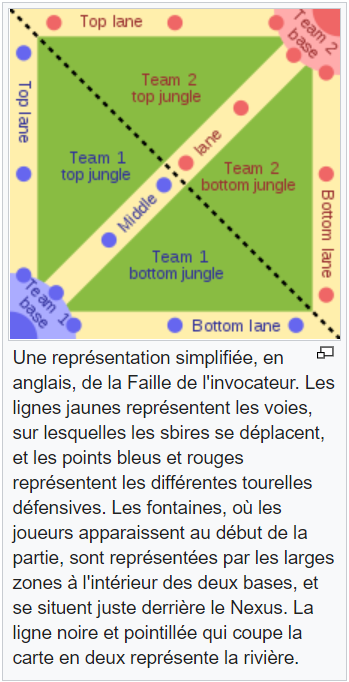

**Sélection du personnage :**

Au début de la partie, chacun des joueurs choisit un personnage à bannir, qui ne pourra donc pas être choisi par les deux équipes, ensuite chacun des joueurs est invité à choisir un personnage parmis la liste des personnages disponibles (150, moins les personnages bannis) et deux sorts d'invocateurs parmis les 8 proposés, les champions son unique mais plusieurs joueurs peuvent choisir un même sort d'invocateur en un seul exemplaire.

**Les Données annalisées :**

Nous avons en notre possésion un échantillion conséquent de cinquante mille parties en mode classé ( mode compétitif ) qui se sont déroulées pendant la saison 9 de League of Legends, donc du 23 janvier au 19 novembre 2019. Chaque partie comporte différentes données pouvant influencer le dénouement de celle-ci, comme sa durée, sa date de création, le choix des personnage des deux équipes, le choix des personnages bannis et différentes informations sur les premiers objectifs pris et leurs nombres par équipe. De plus cette échantillion est issue du serveur d'Europe de l'Ouest et ne comporte pas le poste ni l'équipement du personnage du joueur afin de le rendre plus représentatif. 
En effet l'équipement et le poste du joueur sont des facteurs important mais peuvent fausser notre résultat car dans l'hypothèse ou un joueur chosit un personnage avec 100% de chance de victoire, si celui-ci décide de jouer ce personnage à un poste différent de son poste habituel avec un équipement différent de l'équipement habituel du personnage, il pourrait se retouver facilement avec 0% de victoire.


**Problématique**

J'ai pour objectif de réaliser une étude statistique et graphique sur les meilleures conditions de victoire en milieu compétitif lors de la saison 9 de League of Legends, cela dans le but de pouvoir identifier la combinaison de facteurs garantissant la plus forte tendance de victoire. 

**Amélioration futur de l'étude**

En partant des résultats de cette étude et avec plus d'informations ont pourrais aussi l'appliquer par la suite aux différentes saisons de League of Legends depuis le lancement du mode compétitif et comparer les résultats de nos études, et ainsi pouvoir évaluer l'évolution de la statégie d'équilibrage du jeu de l'entreprise Riot Game et pouvoir prévoir des compositions gagnantes pour les saisons à venir, ce qui serait très utile et demandé par les équipes E-sport League of Legend du monde entier.

# Début de l'étude

Avant de commencer à manipuler de la donnée, je vais dans un premier temps importer les outils qui me sont utile pour realiser ensuite une première observation des données.

In [ ]:
import numpy as np 
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
games = pd.read_csv('../content/sample_data/games.csv')
games

gameId   creationTime  gameDuration  ...  t2_ban3  t2_ban4  t2_ban5
0      3326086514  1504279457970          1949  ...       43       16       51
1      3229566029  1497848803862          1851  ...      238       51      420
2      3327363504  1504360103310          1493  ...      121       57       28
3      3326856598  1504348503996          1758  ...      141       40       51
4      3330080762  1504554410899          2094  ...      201      122       18
...           ...            ...           ...  ...      ...      ...      ...
51485  3308904636  1503076540231          1944  ...       90      238      157
51486  3215685759  1496957179355          3304  ...      119      154      105
51487  3322765040  1504029863961          2156  ...       53       11      157
51488  3256675373  1499562036246          1475  ...       51       90      114
51489  3317333020  1503612754059          1445  ...      141       31       18

[51490 rows x 61 columns]

Parmis ces données, on peut observer deux types de données sur une partie, les données globales, sont par exemple le nombre total de tourelles,dragons,barons pris par l'équipe 1, et les données plus spécifiques en fonction du temps de la partie, comme l'équipe prenant la première tourelle prise ou celle faisant le "premier sang" (premiere élimination).

In [ ]:
ChampDico = pd.read_json('../content/sample_data/champion_info_2.json')
ChampDico

type version                                               data
Aatrox   champion  7.18.1  {'tags': ['Fighter', 'Tank'], 'title': 'the Da...
Ahri     champion  7.18.1  {'tags': ['Mage', 'Assassin'], 'title': 'the N...
Akali    champion  7.18.1  {'tags': ['Assassin'], 'title': 'the Fist of S...
Alistar  champion  7.18.1  {'tags': ['Tank', 'Support'], 'title': 'the Mi...
Amumu    champion  7.18.1  {'tags': ['Tank', 'Mage'], 'title': 'the Sad M...
...           ...     ...                                                ...
Zac      champion  7.18.1  {'tags': ['Tank', 'Fighter'], 'title': 'the Se...
Zed      champion  7.18.1  {'tags': ['Assassin', 'Fighter'], 'title': 'th...
Ziggs    champion  7.18.1  {'tags': ['Mage'], 'title': 'the Hexplosives E...
Zilean   champion  7.18.1  {'tags': ['Support', 'Mage'], 'title': 'the Ch...
Zyra     champion  7.18.1  {'tags': ['Mage', 'Support'], 'title': 'Rise o...

[139 rows x 3 columns]

In [ ]:
SpellDico = pd.read_json('../content/sample_data/summoner_spell_info.json')
SpellDico

type version                                               data
1   summoner  7.17.2  {'id': 1, 'summonerLevel': 6, 'name': 'Cleanse...
11  summoner  7.17.2  {'id': 11, 'summonerLevel': 10, 'name': 'Smite...
12  summoner  7.17.2  {'id': 12, 'summonerLevel': 6, 'name': 'Telepo...
13  summoner  7.17.2  {'id': 13, 'summonerLevel': 1, 'name': 'Clarit...
14  summoner  7.17.2  {'id': 14, 'summonerLevel': 10, 'name': 'Ignit...
21  summoner  7.17.2  {'id': 21, 'summonerLevel': 4, 'name': 'Barrie...
3   summoner  7.17.2  {'id': 3, 'summonerLevel': 4, 'name': 'Exhaust...
30  summoner  7.17.2  {'id': 30, 'summonerLevel': 1, 'name': 'To the...
31  summoner  7.17.2  {'id': 31, 'summonerLevel': 1, 'name': 'Poro T...
32  summoner  7.17.2  {'id': 32, 'summonerLevel': 1, 'name': 'Mark',...
33  summoner  7.17.2  {'id': 33, 'summonerLevel': 1, 'name': 'Nexus ...
34  summoner  7.17.2  {'id': 34, 'summonerLevel': 1, 'name': 'Nexus ...
35  summoner  7.17.2  {'id': 35, 'summonerLevel': 1, 'name': 'Disabl...
36  summoner  7.17.2  {'id': 36, 'summonerLevel': 1, 'name': 'Disabl...
4   summoner  7.17.2  {'id': 4, 'summonerLevel': 8, 'name': 'Flash',...
6   summoner  7.17.2  {'id': 6, 'summonerLevel': 1, 'name': 'Ghost',...
7   summoner  7.17.2  {'id': 7, 'summonerLevel': 1, 'name': 'Heal', ...

In [ ]:
games.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51490 entries, 0 to 51489
Data columns (total 61 columns):
 #   Column              Non-Null Count  Dtype
---  ------              --------------  -----
 0   gameId              51490 non-null  int64
 1   creationTime        51490 non-null  int64
 2   gameDuration        51490 non-null  int64
 3   seasonId            51490 non-null  int64
 4   winner              51490 non-null  int64
 5   firstBlood          51490 non-null  int64
 6   firstTower          51490 non-null  int64
 7   firstInhibitor      51490 non-null  int64
 8   firstBaron          51490 non-null  int64
 9   firstDragon         51490 non-null  int64
 10  firstRiftHerald     51490 non-null  int64
 11  t1_champ1id         51490 non-null  int64
 12  t1_champ1_sum1      51490 non-null  int64
 13  t1_champ1_sum2      51490 non-null  int64
 14  t1_champ2id         51490 non-null  int64
 15  t1_champ2_sum1      51490 non-null  int64
 16  t1_champ2_sum2      51490 non-null  int6

On peut également observer que l'intégralité des données son sous format "integer" donc les données sont déja facilement exploitable.

In [ ]:
games.describe()

gameId  creationTime  ...       t2_ban4       t2_ban5
count  5.149000e+04  5.149000e+04  ...  51490.000000  51490.000000
mean   3.306223e+09  1.502926e+12  ...    108.626044    108.066576
std    2.946096e+07  1.978026e+09  ...    103.346952    102.756149
min    3.214824e+09  1.496892e+12  ...     -1.000000     -1.000000
25%    3.292218e+09  1.502021e+12  ...     38.000000     38.000000
50%    3.320021e+09  1.503844e+12  ...     90.000000     90.000000
75%    3.327099e+09  1.504352e+12  ...    141.000000    141.000000
max    3.331833e+09  1.504707e+12  ...    516.000000    516.000000

[8 rows x 61 columns]

**Analyse de la Heat map**

Notre premiere objectif est d'identifier les caractéristiques avec une forte influence sur le dénouement d'une partie et donc d'étudier autant les fortes influences positives que les négatives. Cela va nous aider à trier les données plus ou moins influente sur la victoire ou defaite d'un joueur.
Pour observer cela on peut utiliser la librairy pandas de "data Analysis" pour générer une carte de chaleur (heat map) pour étudier les correlations entre les colonnes de données de l'échantilion.


Ensuite, je vais réaliser une étude sur la pertinance des données des colonnes en correlation avec le résultat rechercher des échantillions pour voir si elles sont réprésentatives ou non. Je vais m'intéresser aux données totales des parties comme le nombre total de tourelles defensives détruites, de barons ou de dragons pris dans un premier temps, ensuite je m'interesserais aux données faisant référence à la phase de séléction d'un personnage par un joueur.  

In [ ]:
Team1 = games[['winner','firstBlood','t1_towerKills','t1_inhibitorKills','t1_baronKills','t1_dragonKills','t1_riftHeraldKills','gameDuration']]
Team1

winner  firstBlood  ...  t1_riftHeraldKills  gameDuration
0           1           2  ...                   0          1949
1           1           1  ...                   1          1851
2           1           2  ...                   0          1493
3           1           1  ...                   0          1758
4           1           2  ...                   0          2094
...       ...         ...  ...                 ...           ...
51485       2           1  ...                   0          1944
51486       2           1  ...                   0          3304
51487       2           2  ...                   0          2156
51488       2           2  ...                   0          1475
51489       1           1  ...                   0          1445

[51490 rows x 8 columns]

Sachant que la défaite de l"équipe 1 équivaut à la victoire de l'équipe 2 de même pour l'équipe effectuant le "firstBlood".
Je vais donc remplacer les "2" par des zéros et ainsi obtenir un bollean que je vais pouvoir analyser.

In [ ]:
Team1.replace({'winner': {2:0}},inplace=True)
Team1.replace({'firstBlood': {2:0}},inplace=True)
Team1

/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1781: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item_labels[indexer[info_axis]]] = value


winner  firstBlood  ...  t1_riftHeraldKills  gameDuration
0           1           0  ...                   0          1949
1           1           1  ...                   1          1851
2           1           0  ...                   0          1493
3           1           1  ...                   0          1758
4           1           0  ...                   0          2094
...       ...         ...  ...                 ...           ...
51485       0           1  ...                   0          1944
51486       0           1  ...                   0          3304
51487       0           0  ...                   0          2156
51488       0           0  ...                   0          1475
51489       1           1  ...                   0          1445

[51490 rows x 8 columns]

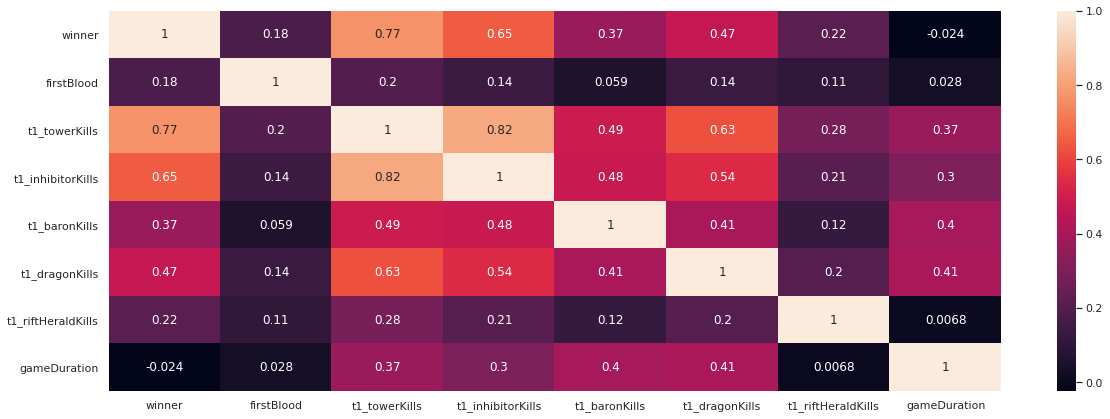

In [ ]:
sns.set_theme()
corr1 = Team1.corr()

f1, ax1 = plt.subplots(figsize=(20,7))
sns.heatmap(corr1, annot=True, ax =ax1)


**Je fait le même processus pour l'équipe numéro deux ou cette fois nous allons remplacer la valeur 1 par 0 et la valeur 2 par 1 pour étudier les conditions de victoire de l'équipe 2.**

/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1781: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item_labels[indexer[info_axis]]] = value


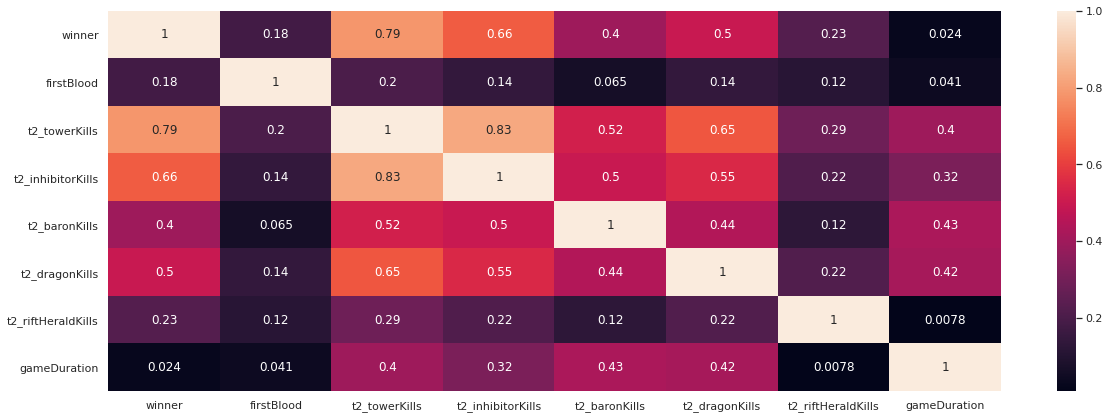

In [ ]:
Team2 = games[['winner','firstBlood','t2_towerKills','t2_inhibitorKills','t2_baronKills','t2_dragonKills','t2_riftHeraldKills','gameDuration']]
Team2.replace({'winner': {1:0}},inplace=True)
Team2.replace({'winner': {2:1}},inplace=True)
Team2.replace({'firstBlood': {1:0}},inplace=True)
Team2.replace({'firstBlood': {2:1}},inplace=True)
corr2 = Team2.corr()
f2, ax2 = plt.subplots(figsize=(20,7))

#Team 2
sns.heatmap(corr2, annot=True, ax =ax2)




On peut déja observer que les deux cartes de chaleur se renssemble en remarquant la similarité entre les coefficient de correlation avec la victoire de l'équipe 1 ou 2, cela nous indique que la victoire de l'équipe 1 ou l'équipe 2 a tendance a être influencée d'une manière similaire, par les caractéristiques d'une partie.

On peut également observer que le nombre de tourelles défensives et d'inhibiteurs pris, influence trés fortement notre variable de victoire, cela est dû au fait des règles du jeu et qu'en cas de défaite, bien souvent l'équipe adverse avance au fur et à mesure vers notre base et prend des tourelles au passage, et donc, on se retrouve avec toute nos tourelles defensives et inhibiteurs de pris par l'équipe victorieuse. Ces deux variables sont donc intimement liees à la victoire ou défaite de l'équipe et ne dépend pas forcement des caractéristiques de la partie, elles ne sont pas assez représentatives des conditions de victoire d'une partie pour notre problématique.

Ce qu'on peut remarquer par contre, c'est que le nombre de dragons et de barons pris, influence fortement notre condition de victoire tout en ne rentrant pas dans le fonctionnement "normal" du jeu, comme la destruction de structure. Nous sommes sur des objectifs dit "facultatifs" à la victoire de la partie, cependant, on peut observer qu'ils influencent fortement les résultats de notre variable de victoire de manière positive.

La forte relation positive que l'on peut observer et lié au faite qu'après la prise d'objectifs, l'équipe ayant prit l'objectif se voit attribuer un bonus, ce qui l'avantage pour gagner la partie mais il n'est pas non plus obligatoire et peut faire l'objet de choix statégique en fonction du nombre de batiment détruit. On peut aussi noter la relation entre la prise d'objectif facultatif et le nombre de tourelle defensive prises par l'équipe, en effet, celle-ci l'influence fortement et positivement et vice et versa, pour la prise d'objectif secondaire (baronKills,dragonKills) qui influence la prise de tourelle defensive.

On peut aussi noter que malgré le fait que la prise d'un baron octroie plus de bonus à l'équipe qu'un dragon, le nombre de dragon reste le facteur le plus influent positivement sur le facteur de victoire. On pourrait formuler l'hypthèse que cela est due au caractère temporaire du bonus accordé par les barons quand ils sont pris et le caractère definitif mais moins puissant du bonus accordé par les dragons quand ils sont pris.

Enfin, on peut observer que la prise du premier sang (premiére élimination) et le nombre d'Herald (objectif secondaire) pris, influence faiblement le facteur de victoire de l'équipe. On peut formuler l'hypothèse que la prise de la première élimination et de l'Herald peuvent être à double tranchant et que même en cas de réussite, elle n'offre que peu d'avantage à l'équipe, ce sont donc des choix moins populaire en terme d'objectif due à la prise de risque pour les accomplir et à leur faible rentabilité pour l'équipe.

Autre élément important, on peut observer une différence significative de la correlation de la victoire de l'équipe 1 sur le temps de la partie et la victoire de l'équipe 2. On peut formuler l'hyphotèse que cela traduit un déséquilibre de niveau de joueur entre la composotion des deux équipes, donc plus la game à tendance à durer, plus cette différence de niveau (ou différence de elo) se fera ressentir et plus l'équipe 2 sera avantagée.

On peut aussi observer que le nombre d'objectifs secondaires et de structures prises sont en forte correlation avec la durée de la partie. Ce qui pourrait être aussi interessant à étudier, ce serait l'évolution de chacun des facteurs principaux influencant nos chances de victoire en fontion de la durée de la partie. 

Au vue de la correlation entre la prise d'objectifs secondaires et la prise de batiment et l'évolution des chances de victoire de l'équipe, j'ai choisi d'étudier le nombre de dragons et barons pris en fonction de la durée de la partie.

Tout d'abord, nous devons vérifier que nos données sont représentatives pour notre objectif.


**Diagramme en boîte**

In [ ]:
Team1.t1_baronKills.describe()

count    51490.000000
mean         0.372286
std          0.583934
min          0.000000
25%          0.000000
50%          0.000000
75%          1.000000
max          5.000000
Name: t1_baronKills, dtype: float64

In [ ]:
Team1.t1_dragonKills.describe()

count    51490.000000
mean         1.387182
std          1.206818
min          0.000000
25%          0.000000
50%          1.000000
75%          2.000000
max          6.000000
Name: t1_dragonKills, dtype: float64

In [ ]:
Team2.t2_baronKills.describe()

count    51490.000000
mean         0.414547
std          0.613768
min          0.000000
25%          0.000000
50%          0.000000
75%          1.000000
max          4.000000
Name: t2_baronKills, dtype: float64

In [ ]:
Team2.t2_dragonKills.describe()

count    51490.000000
mean         1.404370
std          1.224492
min          0.000000
25%          0.000000
50%          1.000000
75%          2.000000
max          6.000000
Name: t2_dragonKills, dtype: float64

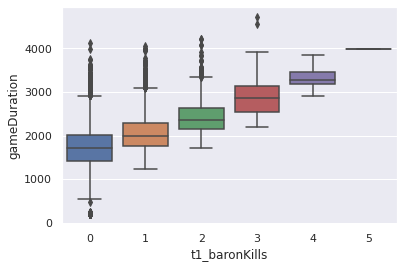

In [ ]:
sns.boxplot(data=Team1, y='gameDuration', x='t1_baronKills')

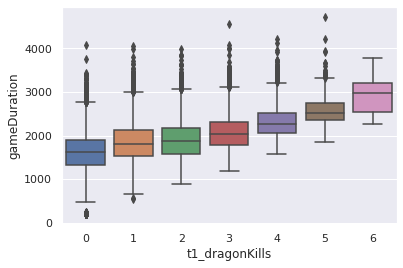

In [ ]:
sns.boxplot(data=Team1, y='gameDuration', x='t1_dragonKills')

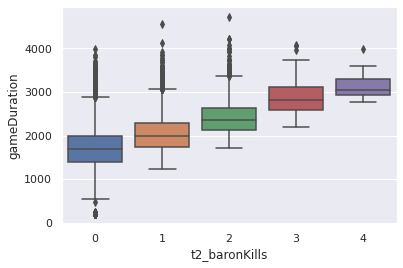

In [ ]:
sns.boxplot(data=Team2, y='gameDuration', x='t2_baronKills')

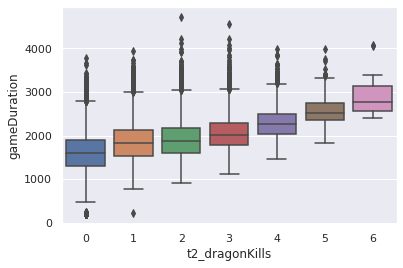

In [ ]:
sns.boxplot(data=Team2, y='gameDuration', x='t2_dragonKills')

On peut observer un comportement similaire des données suivant les deux équipes, cependant on remarque une forte variance dans les résultats ce qui biaise notre moyenne de résultat. 


De plus, on peut observer sur les diagrammes de boîtes, la présence de valeures abérrantes, symbolisée par des point noirs, elles influencent fortement la taille de la variance de notre échantilion.
Le nombre de dragons et de barons prit par une équipe n'est donc pas représentatif en l'état actuel et nous ne pouvons nous baser sur ce critère pour notre étude.

Pour obtenir des données représentatives, nous allons donc débarrasser notre échantillion d'un maximum de valeur aberrante. On peut observer que la majeure partie des données abérrante se situe quand la partie dépasse 3000 unités de temps, nous allons donc prendre les résultats de toute les games qui ont une durée de moins de 3000 pour rendre notre échantillion représentatif.


In [ ]:
games = games[games['gameDuration']<=3000]
games.gameDuration.describe()

count    50806.000000
mean      1813.702693
std        488.677247
min        190.000000
25%       1524.000000
50%       1823.000000
75%       2134.000000
max       3000.000000
Name: gameDuration, dtype: float64

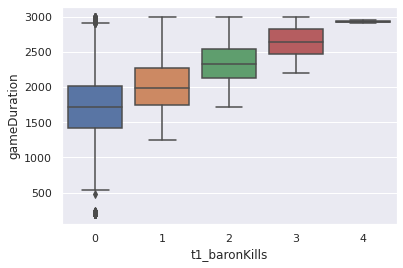

In [ ]:
Team1 = Team1[Team1['gameDuration']<3000]
sns.boxplot(data=Team1, y='gameDuration', x='t1_baronKills')

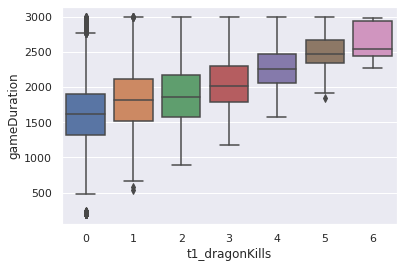

In [ ]:
sns.boxplot(data=Team1, y='gameDuration', x='t1_dragonKills')

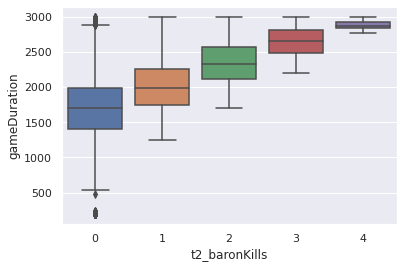

In [ ]:
Team2 = Team2[Team2['gameDuration']<3000]
sns.boxplot(data=Team2, y='gameDuration', x='t2_baronKills')

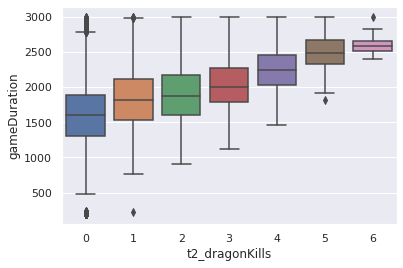

In [ ]:
sns.boxplot(data=Team2, y='gameDuration', x='t2_dragonKills')

**Diagramme avec des données discrètes**

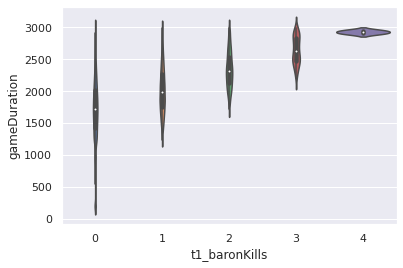

In [ ]:
sns.violinplot(x="t1_baronKills", y="gameDuration", data= Team1,height=7, aspect=3)

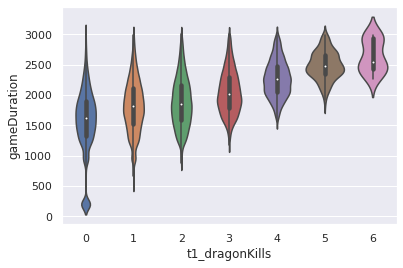

In [ ]:
sns.violinplot(x="t1_dragonKills", y="gameDuration", data= Team1,height=5, aspect=5)

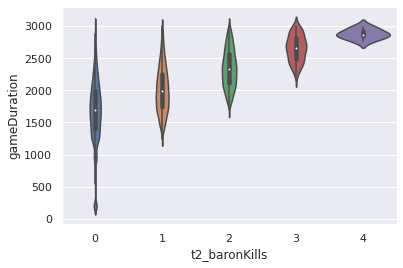

In [ ]:
sns.violinplot(x="t2_baronKills", y="gameDuration", data= Team2,height=5, aspect=5)

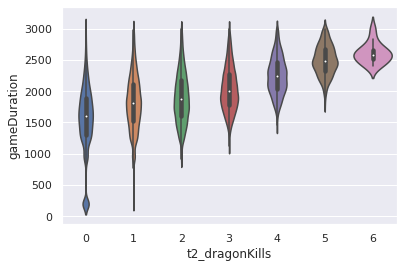

In [ ]:
sns.violinplot(x="t2_dragonKills", y="gameDuration", data= Team2,height=5, aspect=5)

On peut observer que notre courbe débute environ vers 1700 de gameDuration, dans une partie les objectifs n'aparaissent pas dès le début, on peut donc formuler l'hypothèse que le palier 1700 de gameDuration représente l'apparition des objectifs secondaires, tel que les dragons ou les barons.

On peut également remarquer que, plus la partie dure dans le temps, plus l'équipe a tendance à accumuler des objectifs on peut donc émettre l'hypothèse que plus la partie dure, plus l'équipe possédera d'objectifs, plus elle aura de chance de remporter la partie. Cependant, ce cas est vrai pour les deux équipes et dépendra donc du nombre d'objectifs d'une équipe par rapport à une autre.

Un élément que l'on peut également relever, serait la diminution progressive de la variance des résultats de la durée de la partie en fonction des dragons et barons pris, cela pourrait s'expliquer par le caractère "optionnel" de l'objectif et le fait que l'optention de plusieurs bonus cumulés aurait tendance à diminuer la durée d'une partie, car ils creusent l'écart entre les deux équipes.

A contrario, on peut remarquer que la variance de durée de la partie en début de partie est forte le nombre de nos objectif secondaire est faible, on peut formuler l'hypothèse que ce résultat est expliqué par le fait qu'à ce stade, aucune des deux équipes ne prend l'avantage grâce aux objectifs, la partie s'en retrouve plus ou moins rallongée en fonction de la diférence de niveau des joueurs en début de partie uniquement.

On peut voir aussi que la variance de la durée de la partie diminue significativement à l'optention du 5 éme dragon par l'équipe, cela est due au règles de la partie, en effet, une fois les bonus des 5 dragons cummulés par une des deux équipes, celle-ci obtient un multiplicateur de bonus, ce qui augmente chaque bonus qu'elle possède de manière significative, et donc creuse l'écart entre les deux équipes et précipite la fin de la partie.

**Diagramme avec des données continues**


On va aussi chercher à regarder directement l'impact de la durée de la partie sur les chances de victoire d'une équipe.

In [ ]:
Team1.gameDuration.describe()

count    50804.000000
mean      1813.655992
std        488.630175
min        190.000000
25%       1524.000000
50%       1823.000000
75%       2134.000000
max       2999.000000
Name: gameDuration, dtype: float64

On peut observer dans ce cas une variance modérée des résultats, ce qui nous donne une information importante sur le dégrés de représentativité de la moyenne des résultats. On peut considérer la moyenne des durées comme réprésentative.

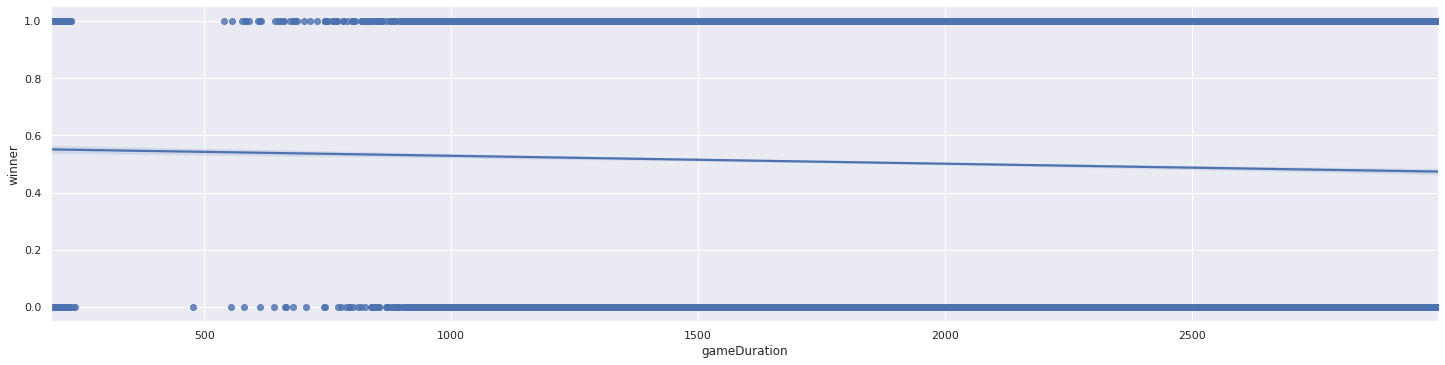

In [ ]:
sns.lmplot(x="gameDuration", y="winner", data= Team1,height=5, aspect=4)

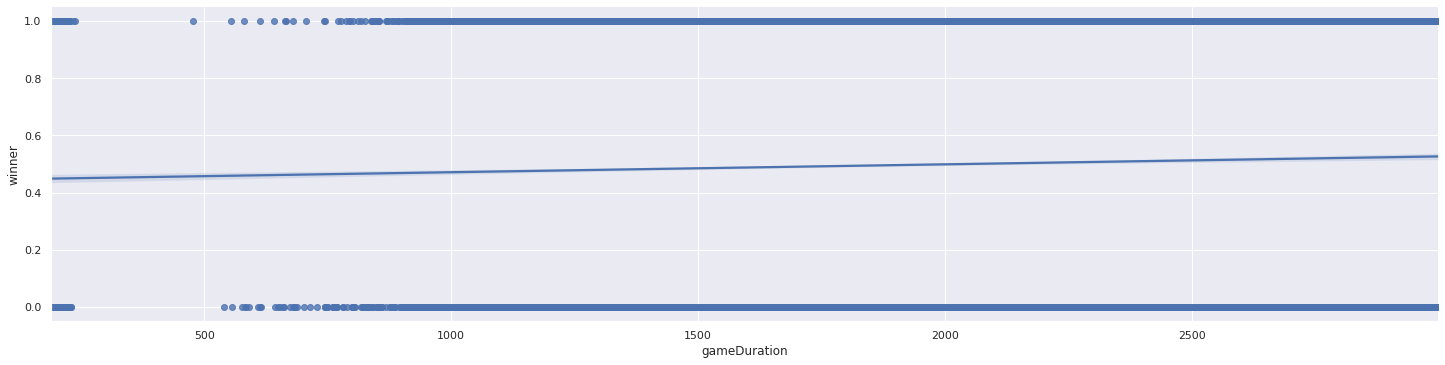

In [ ]:
sns.lmplot(x="gameDuration", y="winner", data= Team2,height=5, aspect=4)

Ici on peut observer un détail important lié à la différence entre les facteurs de correlation des deux équipes par rapport à la durée de la partie, on peut clairement observer une évolution négative des chances de victoire de l'equipe 1 en fonction du temps, tandis que au niveau de l'équipe 2, on peut observer une évolution positive. 

Cela peut s'expliquer par la différence de niveau des joueurs entre les deux équipes, l'équipe 2 corespondant à l'équipe la plus expérimentée, l'équipe 2 (calcul du niveau de l'équipe en fonction d'un classement par "Elo") a donc plus de chance de victoire que l'équipe 1 si la partie dure dans le temps. 

On pourrait formuler l'hypothèse que cela est du au fait que dans un jeu en ligne et principalement en fin de partie, toute l'aspect statégique du jeu est mit en valeur, chaque choix est important et peut coûter chèr, l'équipe la plus expérimentée sera alors en théorie la plus compétente dans la prise de decision et se vera plus fréquemment récompensée par une victoire que l'équipe 1 qui est en théorie plus à même de faire des mauvais choix et donc de cloturer la partie par sa défaite sur une mauvaise décision. 

On pourrait aussi penser que le jeux confronte deux équipes n'ayant pas éxactement le même elo pour des raisons de limitation de temps d'attente pour la recherche d'une partie, il met donc en relation deux équipes de élo (niveau) similaire mais pas égal, l'équipe 2 se trouvant être celle qui a le plus de niveau.

# Liaison avec les dataSet des personnages choisit , et des sorts d'invocateur.

Dans l'objectif d'améliorer la précision de notre résultats, nous allons étudier le choix du champion choisi et banni du joueur. De plus comme expliqué pour la sélection du personnage, nous allons également inclure le choix des deux sorts d'invocateurs un élément de la même importance que le choix du personnage pour le bon déroulement d'une partie de League of Legends.

La phase de selection des personnages se trouve être d'une importance conséquente dans la fiabilité de notre étude car elle défini certains paramétres de la partie, importante pour la complémentarité des caractéristiques de victoire recherchée.

In [ ]:
personnages = pd.read_json((ChampDico['data']).to_json(), orient= 'index')
personnages

tags                   title   id      key     name
Aatrox       [Fighter, Tank]        the Darkin Blade  266   Aatrox   Aatrox
Ahri        [Mage, Assassin]     the Nine-Tailed Fox  103     Ahri     Ahri
Akali             [Assassin]      the Fist of Shadow   84    Akali    Akali
Alistar      [Tank, Support]            the Minotaur   12  Alistar  Alistar
Amumu           [Tank, Mage]           the Sad Mummy   32    Amumu    Amumu
...                      ...                     ...  ...      ...      ...
Zac          [Tank, Fighter]       the Secret Weapon  154      Zac      Zac
Zed      [Assassin, Fighter]   the Master of Shadows  238      Zed      Zed
Ziggs                 [Mage]  the Hexplosives Expert  115    Ziggs    Ziggs
Zilean       [Support, Mage]        the Chronokeeper   26   Zilean   Zilean
Zyra         [Mage, Support]      Rise of the Thorns  143     Zyra     Zyra

[139 rows x 5 columns]

In [ ]:
sorts = pd.read_json((SpellDico['data']).to_json(), orient='index')
sorts

id  ...                                        description
1    1  ...  Removes all disables (excluding suppression an...
11  11  ...  Deals 390-1000 true damage (depending on champ...
12  12  ...  After channeling for 4.5 seconds, teleports yo...
13  13  ...  Restores 50% of your champion's maximum Mana. ...
14  14  ...  Ignites target enemy champion, dealing 70-410 ...
21  21  ...  Shields your champion from 115-455 damage (dep...
3    3  ...  Exhausts target enemy champion, reducing their...
30  30  ...            Quickly travel to the Poro King's side.
31  31  ...  Toss a Poro at your enemies. If it hits, you c...
32  32  ...  Throw a snowball in a straight line at your en...
33  33  ...  In Nexus Siege, Summoner Spells are replaced w...
34  34  ...  In Nexus Siege, Summoner Spells are replaced w...
35  35  ...         Summoner spells are disabled in this mode.
36  36  ...         Summoner spells are disabled in this mode.
4    4  ...  Teleports your champion a short distance towar...
6    6  ...  Your champion gains increased Movement Speed a...
7    7  ...  Restores 90-345 Health (depending on champion ...

[17 rows x 5 columns]

In [ ]:
#Personnages
champIds = ['t1_champ1id','t1_champ2id','t1_champ3id','t1_champ4id','t1_champ5id','t2_champ1id','t2_champ2id','t2_champ3id','t2_champ4id','t2_champ5id']
champIds

['t1_champ1id',
 't1_champ2id',
 't1_champ3id',
 't1_champ4id',
 't1_champ5id',
 't2_champ1id',
 't2_champ2id',
 't2_champ3id',
 't2_champ4id',
 't2_champ5id']

In [ ]:
#Personnages bannies
banIds = ['t1_ban1','t1_ban2','t1_ban3','t1_ban4','t1_ban5','t2_ban1','t2_ban2','t2_ban3','t2_ban4','t2_ban5']
banIds

['t1_ban1',
 't1_ban2',
 't1_ban3',
 't1_ban4',
 't1_ban5',
 't2_ban1',
 't2_ban2',
 't2_ban3',
 't2_ban4',
 't2_ban5']

In [ ]:
#Sorts d'invocateurs de chaque joueur
sumSpellsIds = ['t1_champ1_sum1','t1_champ1_sum2','t1_champ2_sum1','t1_champ2_sum2','t1_champ3_sum1','t1_champ3_sum2','t1_champ4_sum1','t1_champ4_sum2','t1_champ5_sum1','t1_champ5_sum2','t2_champ1_sum1','t2_champ1_sum2','t2_champ2_sum1','t2_champ2_sum2','t2_champ3_sum1','t2_champ3_sum2','t2_champ4_sum1','t2_champ4_sum2','t2_champ5_sum1','t2_champ5_sum2']
sumSpellsIds

['t1_champ1_sum1',
 't1_champ1_sum2',
 't1_champ2_sum1',
 't1_champ2_sum2',
 't1_champ3_sum1',
 't1_champ3_sum2',
 't1_champ4_sum1',
 't1_champ4_sum2',
 't1_champ5_sum1',
 't1_champ5_sum2',
 't2_champ1_sum1',
 't2_champ1_sum2',
 't2_champ2_sum1',
 't2_champ2_sum2',
 't2_champ3_sum1',
 't2_champ3_sum2',
 't2_champ4_sum1',
 't2_champ4_sum2',
 't2_champ5_sum1',
 't2_champ5_sum2']

In [ ]:
#On récupére les informations qui nous interesse pour établir une lien entre l'id du personnage et l'id du personnage de nos parties
personnagesInfos = personnages[['id','name']]
personnagesInfos

id     name
Aatrox   266   Aatrox
Ahri     103     Ahri
Akali     84    Akali
Alistar   12  Alistar
Amumu     32    Amumu
...      ...      ...
Zac      154      Zac
Zed      238      Zed
Ziggs    115    Ziggs
Zilean    26   Zilean
Zyra     143     Zyra

[139 rows x 2 columns]

In [ ]:
#Création d'un dictionaire de donnée avec un tuple former a partir de personnagesInfos
personnagesInfosDico = dict(zip(personnages['id'], personnages['name']))
personnagesInfosDico

{-1: 'None',
 1: 'Annie',
 2: 'Olaf',
 3: 'Galio',
 4: 'Twisted Fate',
 5: 'Xin Zhao',
 6: 'Urgot',
 7: 'LeBlanc',
 8: 'Vladimir',
 9: 'Fiddlesticks',
 10: 'Kayle',
 11: 'Master Yi',
 12: 'Alistar',
 13: 'Ryze',
 14: 'Sion',
 15: 'Sivir',
 16: 'Soraka',
 17: 'Teemo',
 18: 'Tristana',
 19: 'Warwick',
 20: 'Nunu',
 21: 'Miss Fortune',
 22: 'Ashe',
 23: 'Tryndamere',
 24: 'Jax',
 25: 'Morgana',
 26: 'Zilean',
 27: 'Singed',
 28: 'Evelynn',
 29: 'Twitch',
 30: 'Karthus',
 31: "Cho'Gath",
 32: 'Amumu',
 33: 'Rammus',
 34: 'Anivia',
 35: 'Shaco',
 36: 'Dr. Mundo',
 37: 'Sona',
 38: 'Kassadin',
 39: 'Irelia',
 40: 'Janna',
 41: 'Gangplank',
 42: 'Corki',
 43: 'Karma',
 44: 'Taric',
 45: 'Veigar',
 48: 'Trundle',
 50: 'Swain',
 51: 'Caitlyn',
 53: 'Blitzcrank',
 54: 'Malphite',
 55: 'Katarina',
 56: 'Nocturne',
 57: 'Maokai',
 58: 'Renekton',
 59: 'Jarvan IV',
 60: 'Elise',
 61: 'Orianna',
 62: 'Wukong',
 63: 'Brand',
 64: 'Lee Sin',
 67: 'Vayne',
 68: 'Rumble',
 69: 'Cassiopeia',
 72: 'Skarne

In [ ]:
#On remplace les identifiant de champion et de sort ce trouvant dans notre échantillion games par le nom des personnage et sort d'invocateur correspondant 
for idChamp in champIds:
    pick = games[idChamp].replace(personnagesInfosDico, inplace=True)
for idBan in banIds:
    ban = games[idBan].replace(personnagesInfosDico, inplace=True)
games.t1_ban1

0           Riven
1         Caitlyn
2            Lulu
3             Zed
4        Malzahar
           ...   
51484      Illaoi
51485       Fiora
51487         Zed
51488      Draven
51489       Janna
Name: t1_ban1, Length: 50806, dtype: object

In [ ]:
sortsInfos = sorts[['id', 'name']]
sortsInfosDico = dict(zip(sortsInfos['id'],sortsInfos['name']))
for idSpell in sumSpellsIds:
    sort = games[idSpell].replace(sortsInfosDico, inplace=True)
games.t1_champ1_sum1

0        Teleport
1            Heal
2           Flash
3           Flash
4           Flash
           ...   
51484       Flash
51485    Teleport
51487       Smite
51488       Smite
51489     Exhaust
Name: t1_champ1_sum1, Length: 50806, dtype: object

Une fois nos données préparées nous pouvons passer a la phase d'analyse des données.

In [ ]:
#On récupére les champs qui nous interesse sous leur nouvelle forme
Picks = games.loc[:,['t1_champ1id','t1_champ2id','t1_champ3id','t1_champ4id','t1_champ5id','t2_champ1id','t2_champ2id','t2_champ3id','t2_champ4id','t2_champ5id']]
Picks

t1_champ1id t1_champ2id t1_champ3id  ... t2_champ3id t2_champ4id t2_champ5id
0        Vladimir        Bard     Kog'Maw  ...      Darius         Zed      Thresh
1          Draven      Irelia     Nidalee  ...     Hecarim       Yasuo       Riven
2        Tristana        Kayn        Nami  ...       Jayce         Jax        Ashe
3          Maokai       Brand      Twitch  ...      Thresh       Riven        Ashe
4         Warwick      Twitch       Janna  ...        Kayn    Kassadin     Caitlyn
...           ...         ...         ...  ...         ...         ...         ...
51484       Varus       Brand     LeBlanc  ...   Master Yi       Akali        Kayn
51485     Warwick     Kalista       Talon  ...       Vayne       Janna      Gragas
51487        Kayn    Tristana        Bard  ...      Rammus       Karma         Lux
51488     Kha'Zix      Lucian      Illaoi  ...     Morgana     Karthus   Master Yi
51489       Leona       Annie     Camille  ...      Twitch     Kha'Zix    Renekton

[50806 rows x 10 columns]

**Diagramme avec des données catégoriques**

In [ ]:
#On compte le nombre de fois ou le personnage est choisi par le joueur pour une partie
pickTotal = Picks.apply(pd.Series.value_counts)
pickTotal

t1_champ1id  t1_champ2id  ...  t2_champ4id  t2_champ5id
Aatrox            95           76  ...           60           73
Ahri             677          613  ...          643          602
Akali            290          276  ...          293          324
Alistar          319          321  ...          333          358
Amumu            203          231  ...          250          242
...              ...          ...  ...          ...          ...
Zac              258          263  ...          284          226
Zed              659          624  ...          574          606
Ziggs            264          237  ...          207          186
Zilean           136          152  ...          129          146
Zyra             207          254  ...          244          237

[138 rows x 10 columns]

In [ ]:
#On regroupe nos résultat pour obtenir le total de fois on un champion est choisit par le joueur
topPick =pickTotal.sum(axis=1).sort_values(ascending = False).head(10)
topPick= topPick.to_frame()
topPick

0
Thresh    12881
Tristana  12852
Vayne     10534
Kayn       9696
Lee Sin    9059
Twitch     8713
Janna      8603
Lucian     8192
Jhin       7925
Jinx       7886

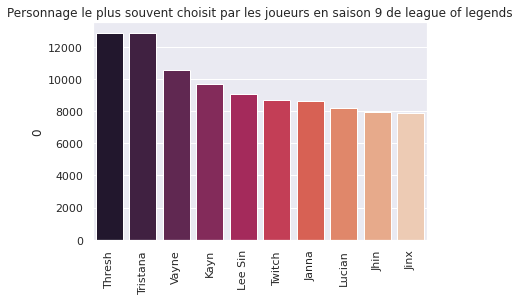

In [ ]:
sns.barplot(x= topPick.index, y= topPick[0], palette='rocket')
plt.xticks(rotation='vertical') # mise des noms des personnage en vertical pour une meilleur visibilité 
plt.title('Personnage le plus souvent choisit par les joueurs en saison 9 de league of legends')
plt.show()

On peut déjà identifier que les champions favoris des joueurs en saison 9 sont Thresh, Tristana et Vayne. On peut formuler l'hypothèse que ces personnages sont populaire soit grâce à leur efficacité, soit grâce à leur accessibilité car il faut généralement tenir compte de ces deux critères lors du choix de notre personnage. Un personnage efficace mais trop complexe ammène des résultats variés et donc non représentatif, nous pouvons donc nous baser sur la popularité du personnage pour nous donner des indications sur ses chances de victoire.

Nous allons maintenant voir du coté du choix du personnage à bannir et des sort d'invocateur choisis, pour cela nous passons par le même processus d'analyse, cela dans le but final de préciser les facteurs de victoire d'une partie avec le meilleur choix de personnage, de sorts et de bannissement.

In [ ]:
Bans = games.loc[:,['t1_ban1','t1_ban2','t1_ban3','t1_ban4','t1_ban5','t2_ban1','t2_ban2','t2_ban3','t2_ban4','t2_ban5']]
banTotal= Bans.apply(pd.Series.value_counts)
banTotal

t1_ban1  t1_ban2  t1_ban3  t1_ban4  ...  t2_ban2  t2_ban3  t2_ban4  t2_ban5
Aatrox        57       73       75       58  ...       69       82       91       62
Ahri         444      437      454      462  ...      431      418      416      475
Akali        430      439      447      458  ...      432      447      443      437
Alistar       45       82       73       79  ...       61       70       91       65
Amumu         54       57       57       75  ...       61       51       71       51
...          ...      ...      ...      ...  ...      ...      ...      ...      ...
Zac         1585     1550     1551     1560  ...     1496     1576     1525     1549
Zed         2478     2582     2569     2405  ...     2482     2476     2454     2553
Ziggs         29       23       21       29  ...       28       28       24       23
Zilean        19       23       16       18  ...       12       15       15       21
Zyra          92      101       94       87  ...       95       96       92       92

[139 rows x 10 columns]

In [ ]:
topBan= banTotal.sum(axis=1).sort_values(ascending = False).head(10)
topBan= topBan.to_frame()#permet de ce repéré en fonction de l'index
topBan

0
Yasuo       32510
Zed         25077
Cho'Gath    24920
Darius      22512
Janna       21212
Draven      20009
Blitzcrank  18440
Kayn        17185
Twitch      15674
Zac         15599

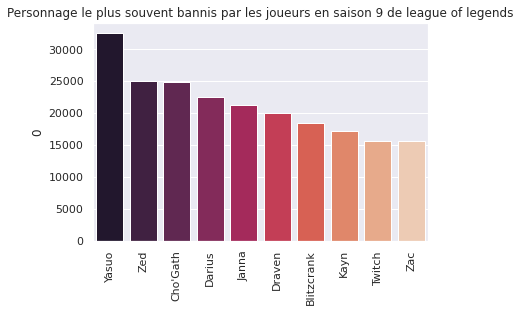

In [ ]:
sns.barplot(x=topBan.index, y=topBan[0], palette='rocket')
plt.xticks(rotation='vertical')
plt.title('Personnage le plus souvent bannis par les joueurs en saison 9 de league of legends')
plt.show()

On observe que la prédominence d'un résultat, le personnage le plus banni par les joueurs est donc Yasuo, bien devant ses prédécesseurs Zed, Cho'Gath et Darius. Dans League of Legends, ces trois personnages sont complexe à manipuler mais en contre-partie, il offre un avantage considérable au joueur de part leur caractéristique propre.

Avec ces résultats, on peut formuler l'hypothèse que le choix du bannissement de la part du joueur est motivé par un principal facteur d'éficacité du personnage, le joueur ne maitrisant un de ces personnages et ne souhaitant donc pas le choisir aura tendance à bannir le personnage afin qu'un membre de l'équipe adverse ne puisse pas le choisir et ainsi maximiser ses chances de victoire.

In [ ]:
sort = games.loc[:, ['t1_champ1_sum1','t1_champ1_sum2','t1_champ2_sum1','t1_champ2_sum2','t1_champ3_sum1','t1_champ3_sum2','t1_champ4_sum1','t1_champ4_sum2','t1_champ5_sum1','t1_champ5_sum2','t2_champ1_sum1','t2_champ1_sum2',
                 't2_champ2_sum1','t2_champ2_sum2','t2_champ3_sum1','t2_champ3_sum2','t2_champ4_sum1','t2_champ4_sum2','t2_champ5_sum1','t2_champ5_sum2']]
sort

t1_champ1_sum1 t1_champ1_sum2  ... t2_champ5_sum1 t2_champ5_sum2
0           Teleport          Flash  ...          Flash        Exhaust
1               Heal          Flash  ...          Flash           Heal
2              Flash           Heal  ...           Heal          Flash
3              Flash       Teleport  ...          Flash           Heal
4              Flash       Teleport  ...          Flash           Heal
...              ...            ...  ...            ...            ...
51484          Flash           Heal  ...          Flash       Teleport
51485       Teleport          Flash  ...          Smite          Flash
51487          Smite          Flash  ...         Ignite          Flash
51488          Smite          Flash  ...          Smite          Flash
51489        Exhaust          Flash  ...       Teleport          Flash

[50806 rows x 20 columns]

In [ ]:
sortTotal = sort.apply(pd.Series.value_counts)
sortTotal

t1_champ1_sum1  t1_champ1_sum2  ...  t2_champ5_sum1  t2_champ5_sum2
Barrier              695             874  ...             620             791
Cleanse              159             197  ...             144             177
Exhaust             3593            4344  ...            3829            4445
Flash              27802           21912  ...           27469           22292
Ghost                732             785  ...             660             702
Heal                4511            5676  ...            4505            5672
Ignite              3778            5139  ...            3908            4969
Smite               4638            5558  ...            4716            5482
Teleport            4898            6321  ...            4955            6276

[9 rows x 20 columns]

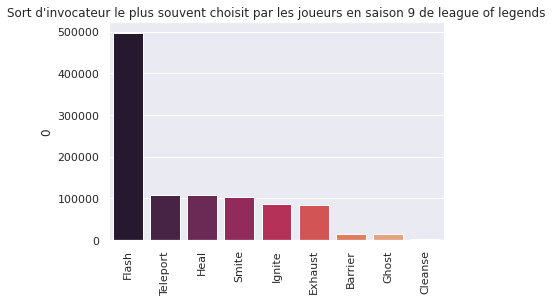

In [ ]:
topSort= sortTotal.sum(axis=1).sort_values(ascending=False).head(10)
topSort= topSort.to_frame()
sns.barplot(x= topSort.index, y=topSort[0], palette='rocket')
plt.xticks(rotation='vertical')
plt.title("Sort d'invocateur le plus souvent choisit par les joueurs en saison 9 de league of legends")
plt.show()

D'après ce graphique, le flash serait le sort d'invocateur le plus choisi parmit les deux posibilités du joueur, Teleport , Heal , Smite son derrière, quasiment au même niveau , puis Ignite et Exhaust.Enfin Barrier Ghost et Cleanse semble être des choix trés impopulaires au sein de notre echantillion de partie.

On peut formuler l'hypothèse que dans le cas où un joueur doit choisir un sort d'invocateur, il est important qu'au moins un sort sur les deux soit un Flash et que le deuxième soit un choix entre Teleport , Heal , Smite, Ignite et Exhaust pour s'assurer les meilleurs conditions de victoire, en effet chacun des joueurs partage le même but, gagner, et leur choix sont principalement dans cet objectif, en identifiant les résultats populaires, cela nous permet de faire un premier tri parmis les données afin de les mettres en relation avec nos conditions de victoire. 

# Conclusion



D'aprés les informations recueillies lors de l'étude, pour obtenir les meilleures chance de victoire, nous allons choisir Tristana ou Thresh comme personnage à jouer, bannir le personnage Yasuo et choisir au moins un flash dans nos deux sort d'invocateur, le joueur devra également se trouver dans l'équipe 2 (dit coté rouge de la carte) qui représente l'équipe avec le plus de "elo" pour s'assurer les meilleures prédispositions de victoire dans un premiere temps. De plus, il faudra partir dans le but de cumuler les objectifs secondaires au sein de la partie afin, encore une fois, de favoriser les chances de victoire de notre joueur.

Cependant compte tenu de la variance générale des résultats de l'échantillion et d'un manque d'informations complémentaires, l'étude posséde un dégrés de précision moyen. En effet l'échantillion de partie compétitif de League of Legends mèle différents niveaux de joueurs, ce qui se trouve être un facteur important dans les chances de victoire d'une équipe.

De plus, certaines données sont manquantes et font donc défaut à la précision de notre étude, tel que le système de génération d'argent d'un joueur au sein d'une partie, l'équipement conseillé d'un personnage (non celui choisi par le joueur), le rang compétitif du joueur, ses déplacements pendant la partie.......

On pourrait formuler l'hypothèse que, en réunissant toute ces données et en les étudiants nous réussisont à définir les paramètres optimals de victoire et ainsi réaliser de la prédiction à grande échelle ou créer une intélligence artificielle capable de s'approcher des 100% de victoire constant, ce que nous ne pouvons pas obtenir avec l'Homme.